# C23-PC663

## Model: BMI

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/500_Person_Gender_Height_Weight_Index.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [4]:
def convert_gender(x):
  if x['Gender'] == 'Male':
    return 0
  else:
    return 1

df['Gender'] = df.apply(convert_gender, axis = 1)
df.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [5]:
train, test = train_test_split(df, test_size=0.1)
train, val  = train_test_split(df, test_size=0.1)

print(len(train), " train examples.")
print(len(val), " validation examples.")
print(len(test), " test examples.")

450  train examples.
50  validation examples.
50  test examples.


In [6]:
train.head()

,Gender,Height,Weight,Index
169,1,188,80,2
411,1,177,101,4
86,1,175,141,5
460,0,179,123,4
475,0,183,131,4


In [7]:
train_features = train.copy()
train_labels   = train_features.pop('Index')
val_features  = val.copy()
val_labels    = val_features.pop('Index')

train_features.head()

,Gender,Height,Weight
169,1,188,80
411,1,177,101
86,1,175,141
460,0,179,123
475,0,183,131


In [8]:
train_labels.head()

169    2
411    4
86     5
460    4
475    4
Name: Index, dtype: int64

In [9]:
train_features = np.array(train_features)
train_features

array([[  1, 188,  80],
       [  1, 177, 101],
       [  1, 175, 141],
       ...,
       [  1, 181, 111],
       [  1, 178,  65],
       [  0, 154,  54]])

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[3]),
    tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [11]:
history = model.fit(train_features, train_labels, validation_data=(val_features, val_labels), epochs=250)

Epoch 1/250
15/15 [==============================] - 3s 39ms/step - loss: 9.8992 - accuracy: 0.1156 - val_loss: 5.9630 - val_accuracy: 0.3400
Epoch 2/250
15/15 [==============================] - 0s 9ms/step - loss: 4.0975 - accuracy: 0.3467 - val_loss: 2.4632 - val_accuracy: 0.3400
Epoch 3/250
15/15 [==============================] - 0s 9ms/step - loss: 2.8352 - accuracy: 0.4111 - val_loss: 2.0605 - val_accuracy: 0.6200
Epoch 4/250
15/15 [==============================] - 0s 12ms/step - loss: 2.2927 - accuracy: 0.5711 - val_loss: 1.9726 - val_accuracy: 0.4200
Epoch 5/250
15/15 [==============================] - 0s 8ms/step - loss: 1.9750 - accuracy: 0.5422 - val_loss: 1.6409 - val_accuracy: 0.6600
Epoch 6/250
15/15 [==============================] - 0s 11ms/step - loss: 1.7498 - accuracy: 0.5689 - val_loss: 1.5443 - val_accuracy: 0.5400
Epoch 7/250
15/15 [==============================] - 0s 9ms/step - loss: 1.5805 - accuracy: 0.5911 - val_loss: 1.3419 - val_accuracy: 0.6600
Epoch 8/25

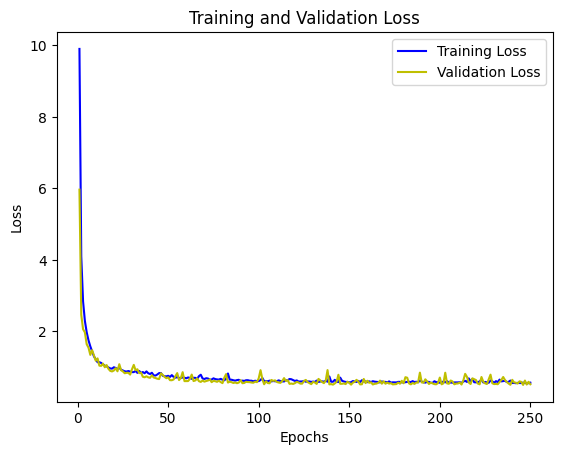

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

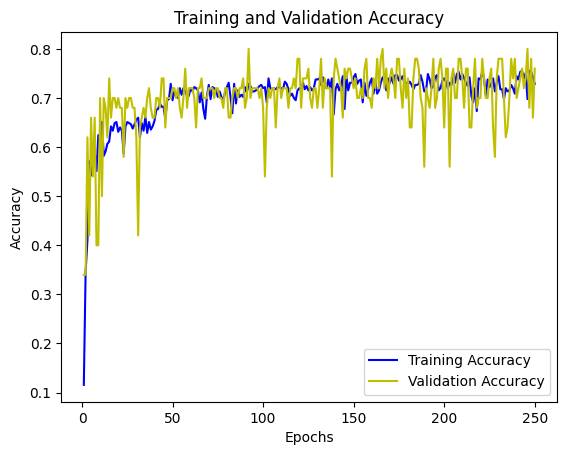

In [13]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'y', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
test_features = [[0, 169, 53]]
test_labels   = model.predict(test_features)

print("Prediction :", np.argmax(test_labels))

1/1 [==============================] - 0s 74ms/step
Prediction : 1


In [28]:
model.save('/content/drive/MyDrive/Colab Notebooks/SavedModel.h5')